In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Build a 2-qubit Grover oracle for |11>
qc = QuantumCircuit(2,2)

# Oracle: flip phase on |11>
qc.cz(0,1)

# Diffuser
qc.h([0,1])
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x([0,1])
qc.h([0,1])

# Measure
qc.measure([0,1],[0,1])

# Run
sim = AerSimulator()
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

print("Measurement results:", counts)
plot_histogram(counts)
plt.show()

Measurement results: {'11': 255, '10': 271, '00': 267, '01': 231}


In [5]:
print(counts)

{'11': 255, '10': 271, '00': 267, '01': 231}


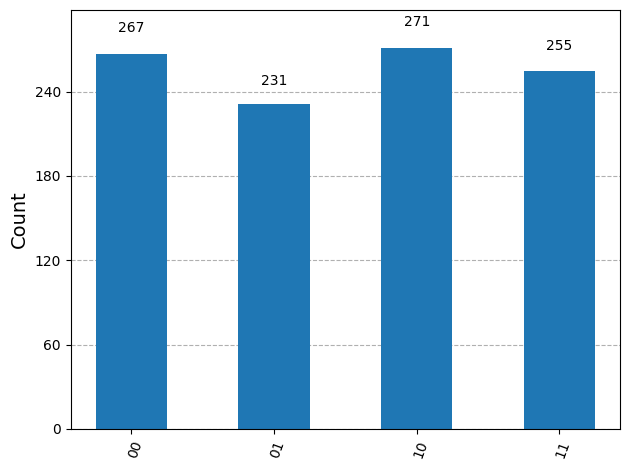

In [6]:
from qiskit.visualization import plot_histogram

# Directly display in Colab
plot_histogram(counts)

In [7]:
qc.draw("text")

┌───┐┌───┐          ┌───┐┌───┐     ┌─┐   
q_0: ─■─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├───
      │ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
q_1: ─■─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
        └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
c: 2/═══════════════════════════════════════╩══╩═
                                            0  1